In [2]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
import glob
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import criticality as crfn
import IS as isfn
import trace_analyse as tfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/Collab/FOXG1/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.8.0 (default, Nov  6 2019, 15:49:01) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Process data

In [2]:
experiment = 'BLNLIGHTPTZ-FOXG1'
savepath = Fdata + experiment + os.sep 
os.chdir(Fdata +  experiment)
binlist = sorted(glob.glob('*_regbinarised*'))
coordlist =  sorted(glob.glob('*labcoord*'))
coordlist, binlist

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'B

In [3]:
dim = [.8, .8, 15] 

#Nearest neighbourhood construction
for i in range(len(coordlist)):
    name = coordlist[i][:coordlist[i].find('run')+7]
    trace = np.load(binlist[i])
    coord = np.load(coordlist[i])
    sub_trace, sub_coord = adfn.select_region(trace, coord, 'Telencephalon')
    
    sub_trace = sub_trace[:,:9828]
    
    data = np.multiply(sub_coord[:,:3].astype(float), dim)   
    nnb = crfn.neighbour(data, 10)
    np.save(savepath + name + 'nnb_10-Tel.npy', nnb)
    print(str(i) + 'of ' + str(len(coordlist)))

0of 35
1of 35
2of 35
3of 35
4of 35
5of 35
6of 35
7of 35
8of 35
9of 35
10of 35
11of 35
12of 35
13of 35
14of 35
15of 35
16of 35
17of 35
18of 35
19of 35
20of 35
21of 35
22of 35
23of 35
24of 35
25of 35
26of 35
27of 35
28of 35
29of 35
30of 35
31of 35
32of 35
33of 35
34of 35


# Avalanches

In [ ]:
experiment = 'BLNLIGHTPTZ-FOXG1'
savepath = Fdata + experiment + os.sep 
os.chdir(Fdata +  experiment)
binlist = sorted(glob.glob('*_regbinarised*'))
nnblist =  sorted(glob.glob('*nnb*10*Tel*'))

In [5]:
#Avalanches
for i in range(len(nnblist)):
    name = nnblist[i][:nnblist[i].find('run')+7]
    
    trace = np.load(binlist[i])
    coord = np.load(coordlist[i])
    sub_trace, sub_coord = adfn.select_region(trace, coord, 'Telencephalon')
    
    sub_trace = sub_trace[:,:9828]
    
    av, pkg = crfn.avalanche(np.load(nnblist[i]), sub_trace)
    np.save(savepath + name + 'av-Tel.npy', av)
    np.save(savepath + name + 'pkg-Tel.npy', pkg)
    print(name)
    print(np.max(av[0]))
    print(np.max(av[1])/2.73)
    print(str(i) + 'of ' + str(len(nnblist)))
    

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
1040
23.80952380952381
0of 35
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
6215
94.87179487179488
1of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
369
19.78021978021978
2of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
1253
27.472527472527474
3of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
930
29.67032967032967
4of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
2007
31.86813186813187
5of 35
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
43050
234.06593406593407
6of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6542
130.76923076923077
7of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
29387
368.13186813186815
8of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
1094
58.24175824175824
9of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
816
28.571428571428573
10of 35
BLNLIGHTP

In [14]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
path='/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNLIGHTPTZ-FOXG1/'
av_list = sorted(glob.glob(path+'**_av-Tel.npy*')) 
av_list

['/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNLIGHTPTZ-FOXG1/BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 '/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNLIGHTPTZ-FOXG1/BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 '/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNLIGHTPTZ-FOXG1/BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 '/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNLIGHTPTZ-FOXG1/BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 '/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNLIGHTPTZ-FOXG1/BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 '/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNLIGHTPTZ-FOXG1/BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 '/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNLIGHTPTZ-FOXG1/BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 

In [138]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
os.chdir(path)
blnlist = sorted(glob.glob('*++*PTZ*_av-Tel.npy*')) 
p5list = sorted(glob.glob('*+--*PTZ*_av-Tel.npy*')) 
p20list = sorted(glob.glob('*---*PTZ*_av-Tel.npy*')) 
blnlist, p5list, p20list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PT

In [61]:
import IS as isfn

#=======================================================================
def size_exponent(data, npart):
#=======================================================================
    """
    Calculates the power law exponent using max likelihood. 
    
    Inputs:
        data (np array): 2d vector of avalanche sizes and avalanche durations
        npart (int): number of samples to draw
        
    Returns:
        size_exp (float): exponent for avalanche size 
        dur_exp (float): exponent for avalanche duration
        
    
    """


    import numpy as np
    #Size
    sizes=data
    M=len(sizes)
    a=min(sizes) #define xmin
    b=max(sizes) #define xmax
    size_exp=isfn.IS(npart, sizes, M, a, b)[0]
    
    return(size_exp)

import IS as isfn

#=======================================================================
def dur_exponent(data, npart):
#=======================================================================
    """
    Calculates the power law exponent using max likelihood. 
    
    Inputs:
        data (np array): 2d vector of avalanche sizes and avalanche durations
        npart (int): number of samples to draw
        
    Returns:
        size_exp (float): exponent for avalanche size 
        dur_exp (float): exponent for avalanche duration
        
    
    """


    import numpy as np
    
    #Dur
    sizes=data
    a=2 #define xmin
    b=max(sizes) #define xmax
    M=len(sizes[np.where(sizes>a-1)])
    dur_exp=isfn.IS(npart, sizes, M, a, b)[0]
        
    return(dur_exp)

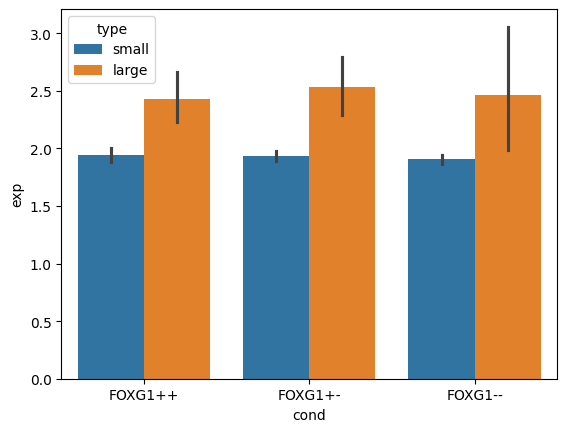

In [140]:
import seaborn as sns

sns.barplot(data=df, x='cond', hue='type', y='exp')
plt.show()

In [118]:
large_av

array([], dtype=int64)

In [139]:
#SIZE EXPONENT, <10
#Calculate exponents
size_thresh = 1000
exp_l, name_l, typ_l = [],[],[]
for i in range(len(av_list)):
    curr_av = np.load(av_list[i])[0]
    basen = os.path.basename(av_list[i])
    name= basen[basen.find('FOXG1'):basen.find('FOXG1')+7]

    small_av = curr_av[curr_av<size_thresh]
    large_av = curr_av[curr_av>size_thresh]
    if len(large_av)==0 or len(small_av)==0: continue
    small_exp = size_exponent(small_av, 2000)
    large_exp = size_exponent(large_av, 2000)
    exp_l.extend((small_exp, large_exp))
    name_l.extend((name,name))
    typ_l.extend(('small', 'large'))

    print(name)
    # print(np.shape(small_av))
    # print(np.shape(large_av))    
df = pd.DataFrame({'exp':exp_l, 'cond':name_l, 'type':typ_l})

FOXG1++
FOXG1++
FOXG1++
FOXG1++
FOXG1++
FOXG1++
FOXG1++
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1--
FOXG1--
FOXG1--
FOXG1--
FOXG1--


In [134]:
#DUR EXPONENT, <10
#Calculate exponents
dur_thresh = 100
exp_l, name_l, typ_l = [],[],[]
for i in range(len(av_list)):
    curr_av = np.load(av_list[i])[0]
    basen = os.path.basename(av_list[i])
    name= basen[basen.find('FOXG1'):basen.find('FOXG1')+7]

    small_av = curr_av[curr_av<dur_thresh]
    large_av = curr_av[curr_av>dur_thresh]
    if len(large_av)==0 or len(small_av)==0: continue
    small_exp = size_exponent(small_av, 2000)
    large_exp = size_exponent(large_av, 2000)
    exp_l.extend((small_exp, large_exp))
    name_l.extend((name,name))
    typ_l.extend(('small', 'large'))

    print(name)
    # print(np.shape(small_av))
    # print(np.shape(large_av))    
df = pd.DataFrame({'exp':exp_l, 'cond':name_l, 'type':typ_l})

FOXG1++
FOXG1++
FOXG1++
FOXG1++
FOXG1++
FOXG1++
FOXG1++
FOXG1++
FOXG1++
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1+-
FOXG1--
FOXG1--
FOXG1--
FOXG1--
FOXG1--
FOXG1--
FOXG1--
FOXG1--
FOXG1--
FOXG1--


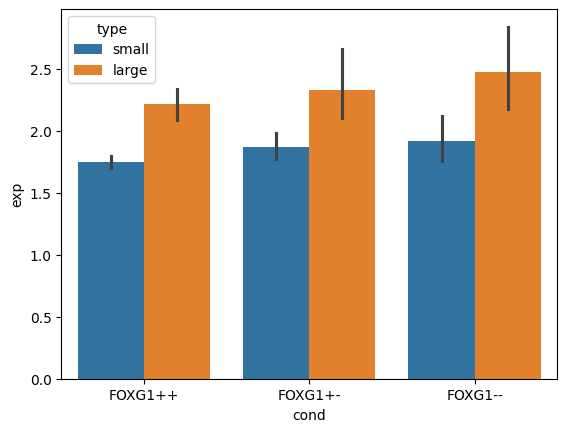

In [136]:
import seaborn as sns
sns.barplot(data=df, x='cond', hue='type', y='exp')
plt.show()

In [137]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming your dataframe 'df' looks like this:
# df = pd.DataFrame({'exp':exp_l, 'cond':name_l, 'type':typ_l})

# Filter the dataframe for each condition and type
foxg1pp_large = df[(df['cond'] == 'FOXG1++') & (df['type'] == 'large')]['exp']
foxg1pm_large = df[(df['cond'] == 'FOXG1+-') & (df['type'] == 'large')]['exp']
foxg1mm_large = df[(df['cond'] == 'FOXG1--') & (df['type'] == 'large')]['exp']

foxg1pp_small = df[(df['cond'] == 'FOXG1++') & (df['type'] == 'small')]['exp']
foxg1pm_small = df[(df['cond'] == 'FOXG1+-') & (df['type'] == 'small')]['exp']
foxg1mm_small = df[(df['cond'] == 'FOXG1--') & (df['type'] == 'small')]['exp']

# Mann-Whitney U Test between FOXG1++ and FOXG1+- for 'large'
u_stat_large_foxg1pp_vs_foxg1pm, p_value_large_foxg1pp_vs_foxg1pm = mannwhitneyu(foxg1pp_large, foxg1pm_large, alternative='two-sided')

# Mann-Whitney U Test between FOXG1++ and FOXG1-- for 'large'
u_stat_large_foxg1pp_vs_foxg1mm, p_value_large_foxg1pp_vs_foxg1mm = mannwhitneyu(foxg1pp_large, foxg1mm_large, alternative='two-sided')

# Mann-Whitney U Test between FOXG1++ and FOXG1+- for 'small'
u_stat_small_foxg1pp_vs_foxg1pm, p_value_small_foxg1pp_vs_foxg1pm = mannwhitneyu(foxg1pp_small, foxg1pm_small, alternative='two-sided')

# Mann-Whitney U Test between FOXG1++ and FOXG1-- for 'small'
u_stat_small_foxg1pp_vs_foxg1mm, p_value_small_foxg1pp_vs_foxg1mm = mannwhitneyu(foxg1pp_small, foxg1mm_small, alternative='two-sided')

# Print results
print(f"Mann-Whitney U test (large type): FOXG1++ vs FOXG1+-: U = {u_stat_large_foxg1pp_vs_foxg1pm}, p = {p_value_large_foxg1pp_vs_foxg1pm}")
print(f"Mann-Whitney U test (large type): FOXG1++ vs FOXG1--: U = {u_stat_large_foxg1pp_vs_foxg1mm}, p = {p_value_large_foxg1pp_vs_foxg1mm}")

print(f"Mann-Whitney U test (small type): FOXG1++ vs FOXG1+-: U = {u_stat_small_foxg1pp_vs_foxg1pm}, p = {p_value_small_foxg1pp_vs_foxg1pm}")
print(f"Mann-Whitney U test (small type): FOXG1++ vs FOXG1--: U = {u_stat_small_foxg1pp_vs_foxg1mm}, p = {p_value_small_foxg1pp_vs_foxg1mm}")


Mann-Whitney U test (large type): FOXG1++ vs FOXG1+-: U = 69.0, p = 0.7289914546163012
Mann-Whitney U test (large type): FOXG1++ vs FOXG1--: U = 35.0, p = 0.437942822899974
Mann-Whitney U test (small type): FOXG1++ vs FOXG1+-: U = 37.0, p = 0.10819724752370144
Mann-Whitney U test (small type): FOXG1++ vs FOXG1--: U = 35.0, p = 0.437942822899974


In [65]:
#EXPONENT
#Calculate exponents

for i in range(len(av_list)):
    curr_av = np.load(av_list[i])
    exp = crfn.power_exponent(curr_av, 2000)
    name = av_list[i][:av_list[i].find('run')+7]
    
    np.save(savepath + name + 'exp-Tel.npy', exp)

    print(name)
    print(str(i) + 'of ' + str(len(av_list)))
    

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
0of 35
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
1of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
2of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
3of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
5of 35
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
7of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
8of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
9of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
10of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
11of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_
12of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
13of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_
14of

In [147]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
wt_list = sorted(glob.glob('*++*PTZ02_*exp-*.npy*')) 
het_list = sorted(glob.glob('*+--*PTZ02_*exp-*.npy*')) 
hom_list = sorted(glob.glob('*---*PTZ02_*exp-*.npy*')) 

wt_list, het_list, hom_list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--09_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_exp-Tel.npy',
  'BLNLIGHTPTZ-FOXG1---03_2photon_se

In [153]:
l_list = wt_list, het_list, hom_list
wt, het, hom = [],[],[]
choose = 0
for i in range(len(l_list)):
    print(i)
    for e in range(len(l_list[i])):
        if i == 0:
            wt = np.append(wt, np.load(l_list[i][e])[choose])
        if i == 1:
            het = np.append(het, np.load(l_list[i][e])[choose])
            
        if i == 2:
            hom = np.append(hom, np.load(l_list[i][e])[choose])

0
1
2


In [154]:
point = np.zeros((17))

p_spike_df = {}
count=0
choose = 0

data = [wt, het, hom]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

p_spike_df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

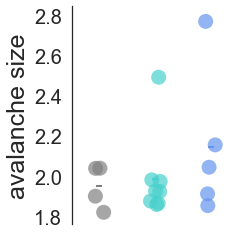

In [155]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (3,4))
ax = sns.pointplot(x="Labels", y="data", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.7)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('avalanche size', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.ylim(top = 2000, bottom = 0)

plt.savefig(Ffig + 'avsize_exp_ptz.svg', transparent = True)
plt.show()

In [121]:
from scipy import stats
data = wt
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

2.4264755101625637 0.07917176854787765


In [122]:
from scipy import stats
data = het
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)


2.4856069765594784 0.11116600547151397


In [123]:
from scipy import stats
data = hom
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)


2.7967118322609372 0.2895103142299513


In [97]:
#Space
alpha = 0.05

t, p = stats.ttest_ind(wt, hom)
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -1.1033453023776383   p = 0.3063574503876628
Samples are the same


In [124]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(wt, het)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(wt, hom)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 15.0   p = 0.46616218667416665
U = 5.0   p = 0.13517207032739004


In [20]:
#Loglikelihood ratio

for i in range(len(av_list)):
    curr_av = np.load(av_list[i])
    LLR = crfn.LLR(curr_av, 2000)
    name = av_list[i][:av_list[i].find('run')+7]
    
    np.save(name + 'LLR-Tel.npy', LLR)

    print(name)
    print(str(i) + 'of ' + str(len(av_list)))
    

/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNLIGHTPTZ-FOXG1/BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
0of 33
/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNLIGHTPTZ-FOXG1/BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
1of 33
/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNLIGHTPTZ-FOXG1/BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
2of 33
/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNLIGHTPTZ-FOXG1/BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
3of 33
/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNLIGHTPTZ-FOXG1/BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4of 33
/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNLIGHTPTZ-FOXG1/BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
5of 33
/Users/dominicburrows/Dropbox/PhD/Analysis/Project/BLNLIGHTPTZ-FOXG1/BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6of 33
/Users/dominicburrows/Dropbox/PhD/Analysis/Project

In [22]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
wt_list = sorted(glob.glob('*++*BLNLIGHT*LLR*')) 
het_list = sorted(glob.glob('*+--*BLNLIGHT*LLR*')) 
hom_list = sorted(glob.glob('*---*BLNLIGHT*LLR*')) 

wt_list, het_list, hom_list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_LLR-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_LLR-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_LLR-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_LLR-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_LLR-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_LLR-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_LLR-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_LLR-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_BLNLIGHT_run-01_LLR-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_BLNLIGHT_run-01_LLR-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_BLNLIGHT_run-01_LLR-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_BLNLIGHT_run-01_LLR-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_BLNLIGHT_run-01_LLR-Tel.npy

In [25]:
for i in wt_list + het_list + hom_list:
    print(np.load(i))

[25607.68433283 41252.53302241]
[5467.7170963  9506.25438393]
[23033.39515458 37810.92026979]
[35153.0458508  44159.74234856]
[30536.8884293  42784.86529496]
[25128.14297516 35287.02924565]
[25390.80771017 36326.3329709 ]
[17707.27444365 24043.30332724]
[23633.22027178 30084.27072431]
[25799.74629337 41064.52956538]
[26506.04933676 34925.94947924]
[ 9704.27617575 19751.26089026]
[17308.78292491 33536.0156411 ]
[ 9253.55480917 14119.17263083]
[21052.3406201  29103.16235518]
[32886.06472429 48019.77594585]
[14949.80327811 21215.81912456]


In [ ]:
point = np.zeros((17))

p_spike_df = {}
count=0
choose = 0

data = [wt, het, hom]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

p_spike_df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

In [38]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
os.chdir(path)
blnlist = sorted(glob.glob('*++*BLNLIGHT_*_av-Tel.npy*')) 
p5list = sorted(glob.glob('*+--*BLNLIGHT_*_av-Tel.npy*')) 
p20list = sorted(glob.glob('*---*BLNLIGHT_*_av-Tel.npy*')) 
blnlist, p5list, p20list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
  'BLNLIGH

In [36]:
#Size
print('++')
for i in blnlist:
    fit = powerlaw.Fit(np.load(i)[0])
    R, p_value = fit.distribution_compare('power_law', 'lognormal')

    print(f"Loglikelihood ratio: {R}")
    print(f"p-value: {p_value}")

    if p_value < 0.05:
        print("The data is significantly different from a power-law distribution.")
    else:
        print("The data is consistent with a power-law distribution.")

#Size
print('+-')
for i in p5list:
    fit = powerlaw.Fit(np.load(i)[0])
    R, p_value = fit.distribution_compare('power_law', 'lognormal')

    print(f"Loglikelihood ratio: {R}")
    print(f"p-value: {p_value}")

    if p_value < 0.05:
        print("The data is significantly different from a power-law distribution.")
    else:
        print("The data is consistent with a power-law distribution.")

#Size
print('--')
for i in p20list:
    fit = powerlaw.Fit(np.load(i)[0])
    R, p_value = fit.distribution_compare('power_law', 'lognormal')

    print(f"Loglikelihood ratio: {R}")
    print(f"p-value: {p_value}")

    if p_value < 0.05:
        print("The data is significantly different from a power-law distribution.")
    else:
        print("The data is consistent with a power-law distribution.")


++
Calculating best minimal value for power law fit
Loglikelihood ratio: -0.44845844540598634
p-value: 0.5811229427720564
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: -4.97459321662658
p-value: 0.038533269143777735
The data is significantly different from a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: -0.539001215920198
p-value: 0.5216360486205422
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: -0.4046151195520711
p-value: 0.5826929958989466
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Loglikelihood ratio: 0.2134561415082521
p-value: 0.28698452014017317
The data is consistent with a power-law distribution.
+-
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Loglikelihood ratio: 0.3370354517443719
p-value: 0.00030548005624354716
The data is significantly different from a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: -1.4107577265540794
p-value: 0.2712532857722211
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: -34.140792819443675
p-value: 4.876941966803628e-07
The data is significantly different from a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: 0.02963753412871739
p-value: 0.6954085621315924
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Loglikelihood ratio: -0.5421857402963095
p-value: 0.169329010041247
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: -6.075647547183088
p-value: 0.04026753650242826
The data is significantly different from a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: 0.01347805913433664
p-value: 0.2174317546717225
The data is consistent with a power-law distribution.
--
Calculating best minimal value for power law fit
Loglikelihood ratio: -1.3166534612527094
p-value: 0.32118981864884966
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Loglikelihood ratio: -4.185166076530419
p-value: 0.08418755459636282
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: -25.823753680828702
p-value: 2.5315280108729377e-06
The data is significantly different from a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: 0.009608174514092571
p-value: 0.9073982835376697
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: -7.824719409851236
p-value: 0.014943962417279804
The data is significantly different from a power-law distribution.


In [37]:
#Size
print('++')
for i in blnlist:
    fit = powerlaw.Fit(np.load(i)[1])
    R, p_value = fit.distribution_compare('power_law', 'lognormal')

    print(f"Loglikelihood ratio: {R}")
    print(f"p-value: {p_value}")

    if p_value < 0.05:
        print("The data is significantly different from a power-law distribution.")
    else:
        print("The data is consistent with a power-law distribution.")

#Size
print('+-')
for i in p5list:
    fit = powerlaw.Fit(np.load(i)[1])
    R, p_value = fit.distribution_compare('power_law', 'lognormal')

    print(f"Loglikelihood ratio: {R}")
    print(f"p-value: {p_value}")

    if p_value < 0.05:
        print("The data is significantly different from a power-law distribution.")
    else:
        print("The data is consistent with a power-law distribution.")

#Size
print('--')
for i in p20list:
    fit = powerlaw.Fit(np.load(i)[1])
    R, p_value = fit.distribution_compare('power_law', 'lognormal')

    print(f"Loglikelihood ratio: {R}")
    print(f"p-value: {p_value}")

    if p_value < 0.05:
        print("The data is significantly different from a power-law distribution.")
    else:
        print("The data is consistent with a power-law distribution.")


++
Calculating best minimal value for power law fit
Loglikelihood ratio: -0.7935350451626497
p-value: 0.00011698318565325732
The data is significantly different from a power-law distribution.
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Loglikelihood ratio: -0.018023880969480155
p-value: 0.9077549662134584
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: -1.0784760927044894
p-value: 0.09816145082148432
The data is consistent with a power-law distribution.


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Loglikelihood ratio: 0.10591701533419018
p-value: 0.09042103093800494
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: 0.0038300593458076015
p-value: 0.9127156017058062
The data is consistent with a power-law distribution.
+-
Calculating best minimal value for power law fit
Loglikelihood ratio: -0.9431752807917126
p-value: 0.3737385839647652
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Loglikelihood ratio: -0.698351720033136
p-value: 0.18301429677897585
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Loglikelihood ratio: -0.4332616088454806
p-value: 0.36623289242530277
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Loglikelihood ratio: 0.1527339805825192
p-value: 3.1885409018339825e-05
The data is significantly different from a power-law distribution.
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Loglikelihood ratio: -2.011063433886333
p-value: 0.04168815141161374
The data is significantly different from a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: -0.29227647550180436
p-value: 0.25763805400197204
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: -1.005109513550607
p-value: 0.005556009914043708
The data is significantly different from a power-law distribution.
--
Calculating best minimal value for power law fit
Loglikelihood ratio: -0.8700595253489884
p-value: 0.09133616006759387
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: -0.024661673447666344
p-value: 0.8928167069198562
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: -1.7935719928108709
p-value: 0.04525522999777662
The data is significantly different

'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Loglikelihood ratio: -0.5879820014994244
p-value: 0.3252951781577901
The data is consistent with a power-law distribution.
Calculating best minimal value for power law fit
Loglikelihood ratio: 0.021250406558262935
p-value: 0.3765909713878195
The data is consistent with a power-law distribution.


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


In [33]:
import powerlaw
fit = powerlaw.Fit(prc[0])
R, p_value = fit.distribution_compare('power_law', 'lognormal')


Calculating best minimal value for power law fit


In [34]:
print(f"Loglikelihood ratio: {R}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("The data is significantly different from a power-law distribution.")
else:
    print("The data is consistent with a power-law distribution.")


Loglikelihood ratio: -4.97459321662658
p-value: 0.038533269143777735
The data is significantly different from a power-law distribution.


In [28]:
import powerlaw
import matplotlib.pyplot as plt

# Example: Your data (replace 'data' with your actual dataset)
data = [your_values]  # Your set of values as a list or numpy array

# Fit the data to a power-law distribution
fit = powerlaw.Fit(data)

# Plot the data and the power-law fit
fig = plt.figure()
fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', linewidth=2)
plt.show()

# Perform the Kolmogorov-Smirnov test to compare the data to a power-law
R, p_value = fit.distribution_compare('power_law', 'lognormal')

print(f"Loglikelihood ratio: {R}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("The data is significantly different from a power-law distribution.")
else:
    print("The data is consistent with a power-law distribution.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 8.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
colors2 = ['grey','mediumturquoise','cornflowerblue']


NameError: name 'bln_histlist' is not defined

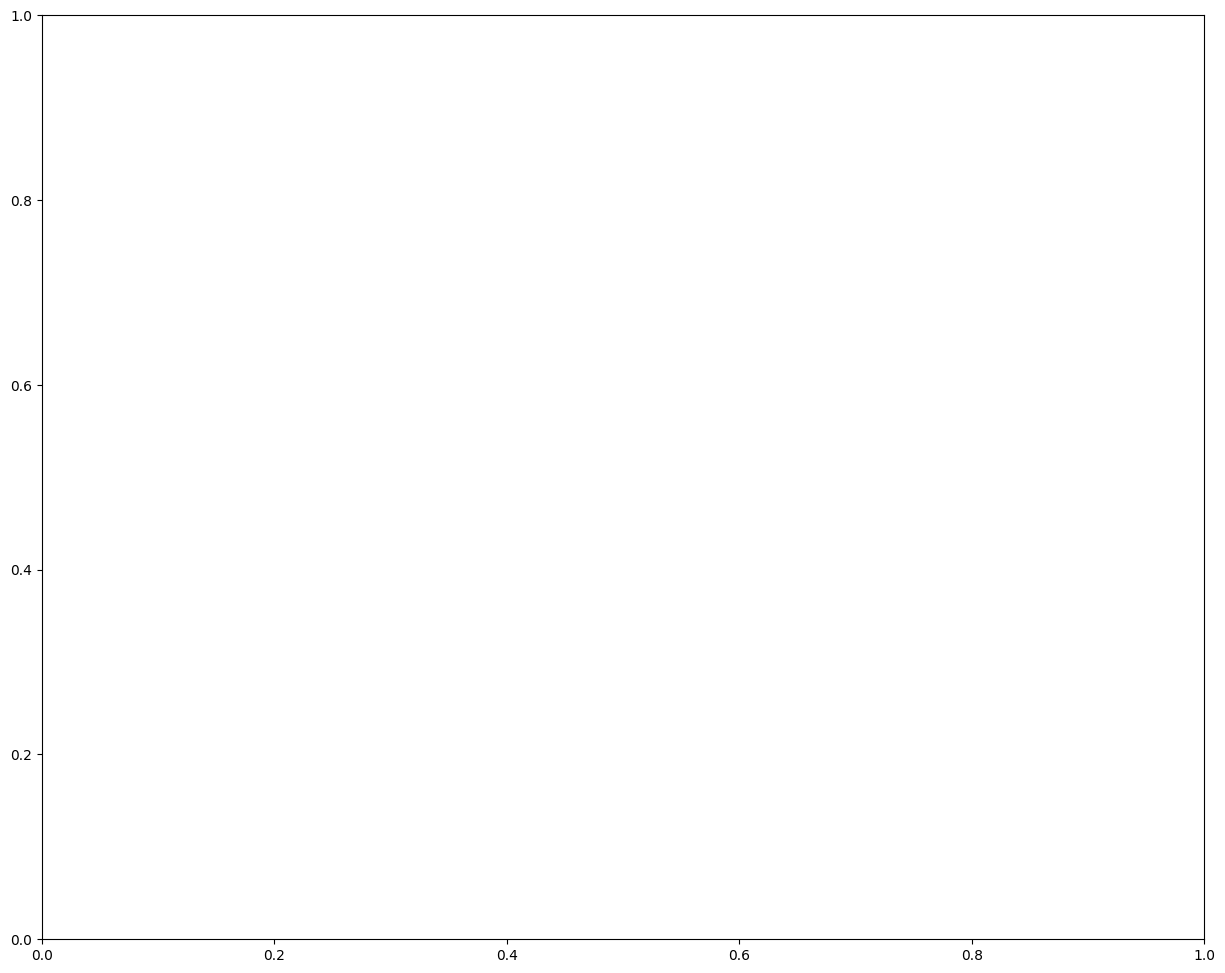

In [13]:
from scipy import stats
import matplotlib

fig, axarr = plt.subplots(figsize = (15,12))  

stop = 300000
xaxis = np.mean(bln_histlist, axis= 0)
sem = stats.sem(bln_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus,facecolor='k',alpha=0.3,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'grey', linewidth = 14)

stop = 300000
xaxis = np.mean(p5_histlist, axis= 0)
sem = stats.sem(p5_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0.
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus,facecolor='green',alpha=0.3,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'mediumturquoise', linewidth = 14, linestyle= '-')

stop = 300000
xaxis = np.mean(p20_histlist, axis= 0)
sem = stats.sem(p20_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus, facecolor='royalblue',alpha=0.3,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'cornflowerblue', linewidth = 14, linestyle = '-')


axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
#plt.xlim(right = 400)  
plt.ylim(bottom = 0.000003)  
axarr.set_ylabel('P(S)', size = '40')
axarr.set_xlabel('Avalanche size (events)', size = '40')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 30)
plt.xticks(size = 30)
plt.savefig(Ffig + 'avsize_foxg1_spont_mean.svg', transparent = True)
plt.show()

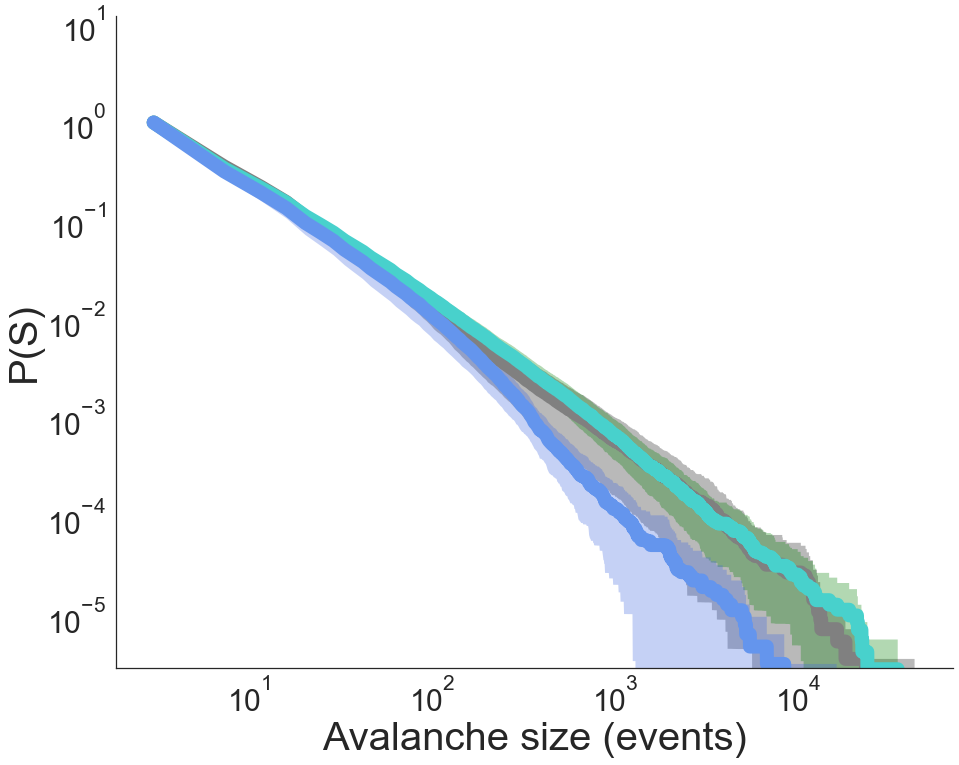

In [359]:
from scipy import stats
import matplotlib

fig, axarr = plt.subplots(figsize = (15,12))  

stop = 300000
xaxis = np.mean(bln_histlist, axis= 0)
sem = stats.sem(bln_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus,facecolor='k',alpha=0.3,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'grey', linewidth = 14)

stop = 300000
xaxis = np.mean(p5_histlist, axis= 0)
sem = stats.sem(p5_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0.
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus,facecolor='green',alpha=0.3,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'mediumturquoise', linewidth = 14, linestyle= '-')

stop = 300000
xaxis = np.mean(p20_histlist, axis= 0)
sem = stats.sem(p20_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus, facecolor='royalblue',alpha=0.3,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'cornflowerblue', linewidth = 14, linestyle = '-')


axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
#plt.xlim(right = 400)  
plt.ylim(bottom = 0.000003)  
axarr.set_ylabel('P(S)', size = '40')
axarr.set_xlabel('Avalanche size (events)', size = '40')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 30)
plt.xticks(size = 30)
plt.savefig(Ffig + 'avsize_foxg1_spont_mean.svg', transparent = True)
plt.show()

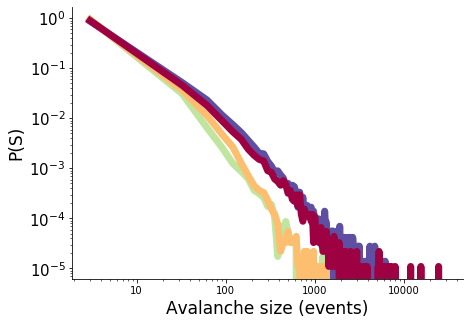

In [4]:
import seaborn as sns
from matplotlib import cm 

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

binchoose = 1000
choose = wt_list
#labels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$']
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))


#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))
binvec = []
for i in range(len(choose)):
    binvec = np.append(binvec, np.load(choose[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)

for i in range(len(choose)):
    avdistcut = np.load(choose[i])[0]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.ylim(bottom = 0.00001)  
#plt.xlim(right = 1000)  
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)

#plt.savefig(Ffig + 'av_size.svg', transparent = True)
plt.show()

In [5]:
import seaborn as sns
from matplotlib import cm 

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

binchoose = 1000
choose = het_list
#labels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$']
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))


#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))
binvec = []
for i in range(len(choose)):
    binvec = np.append(binvec, np.load(choose[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)

for i in range(len(choose)):
    avdistcut = np.load(choose[i])[0]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.ylim(bottom = 0.00001)  
#plt.xlim(right = 1000)  
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)

#plt.savefig(Ffig + 'av_size.svg', transparent = True)
plt.show()

In [6]:
import seaborn as sns
from matplotlib import cm 

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

binchoose = 1000
choose = hom_list
typ = 0
#labels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$']
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))


#colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(choose)))
binvec = []
for i in range(len(choose)):
    binvec = np.append(binvec, np.load(choose[i])[0
                                                 ])
mini = np.min(binvec)
maxi = np.max(binvec)

for i in range(len(choose)):
    avdistcut = np.load(choose[i])[0]
    binned=np.linspace(mini,maxi, binchoose)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.ylim(bottom = 0.00001)  
#plt.xlim(right = 1000)  
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)

#plt.savefig(Ffig + 'av_size.svg', transparent = True)
plt.show()

In [16]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
av_list = sorted(glob.glob('**_av-*npy*')) 
av_list

['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_av-Tel.npy',
 'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6d

# Exponent relations

In [143]:
#Exponent relations

#Calculate empirical exponent relation

for i in range(len(av_list)):
    curr_av = np.load(av_list[i])
    dcc = crfn.DCC(curr_av)
    name = os.path.basename(av_list[i][:av_list[i].find('run')+7])
    
    np.save(path + name + 'dcc-Tel.npy', dcc)

    print(name)
    print(str(i) + 'of ' + str(len(av_list)))
    

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
0of 33
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
1of 33
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
2of 33
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
3of 33
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4of 33
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
5of 33
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6of 33
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
7of 33
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
8of 33
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
9of 33
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
10of 33
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
11of 33
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_
12of 33
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
13of 33
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_
14of

In [175]:
# Create datalists
#---------------------------------------------------------------------------
blnlist = sorted(glob.glob('*++*PTZ02_*_av.npy*'))
p5list = sorted(glob.glob('*+--*PTZ02_*_av.npy*'))
p20list = sorted(glob.glob('*---*PTZ02_*_av.npy*'))
blnlist, p5list, p20list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_av.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_PTZ02_run-01_av.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1---03_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1---04_2photon_sess-01-6dpf_PTZ02_run-01_av.npy',
  'BLNLIGHTPTZ-FOXG1---05_2photo

In [157]:
def prac(data):
    avsize = np.load(data)[0]
    avdur = (1/2.73)*np.load(data)[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    return(sizevec,durvec)

In [ ]:
colors2 = ['grey','mediumturquoise','cornflowerblue']


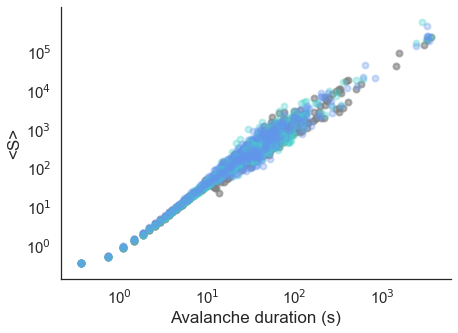

In [178]:
fig, axarr = plt.subplots(figsize = (7,5))
import matplotlib
from matplotlib import cm

labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$', '10$^3$','10$^4$','10$^5$']

for i in range(len(blnlist)):    
    yaxis, xaxis = prac(blnlist[i])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 0.6, c = 'grey')
    axarr.set_xscale('log')
    axarr.set_yscale('log')


for i in range(len(blnlist)):    
    yaxis, xaxis = prac(p5list[i])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 0.3, c = 'mediumturquoise')
    yaxis, xaxis = prac(p20list[i])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 0.3, c = 'cornflowerblue')

    axarr.set_xscale('log')
    axarr.set_yscale('log')
    

    
    
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('Avalanche duration (s)', size = '17')
axarr.set_ylabel('<S>', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

axarr.set_xticklabels(labels, size = 15)
axarr.set_yticklabels(labels, size = 15)
#plt.xlim(right = 800) 
#plt.ylim(top = 300000)  


plt.savefig(Ffig + 'av_sizexdur_foxg1_PTZ.svg', transparent = True)
plt.show()

In [178]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
wt_list = sorted(glob.glob('*++*BLNLIGHT*_dcc-*.npy*')) 
het_list = sorted(glob.glob('*+--*BLNLIGHT*_dcc-*.npy*')) 
hom_list = sorted(glob.glob('*---*BLNLIGHT*_dcc-*.npy*')) 

wt_list, het_list, hom_list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_dcc-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_BLNLIGHT_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_BLNLIGHT_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_BLNLIGHT_run-01_dcc-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_BLNLIGHT_run-01_dcc-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_BLNLIGHT_run-01_dcc-Tel.npy

In [179]:
l_list = wt_list, het_list, hom_list
wt, het, hom = [],[],[]
for i in range(len(l_list)):
    print(i)
    for e in range(len(l_list[i])):
        if i == 0:
            wt = np.append(wt, np.load(l_list[i][e]))
        if i == 1:
            het = np.append(het, np.load(l_list[i][e]))
            
        if i == 2:
            hom = np.append(hom, np.load(l_list[i][e]))

0


1
2


In [162]:
len(wt_list + het_list +hom_list)

17

In [166]:
point = np.zeros((17))

p_spike_df = {}
count=0
choose = 0

data = [wt, het, hom]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

p_spike_df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',7),adfn.repeat_list('HOM',5)))})



/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_67659/1500313308.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.pointplot(x="Labels", y="data", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_67659/1500313308.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(x="Labels", y="data", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_67659/1500313308.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  ax = sns.pointplot(x="Labels", y="data", data = p_spike_df, hue = 'Labels', pale

AttributeError: 'NoneType' object has no attribute 'remove'

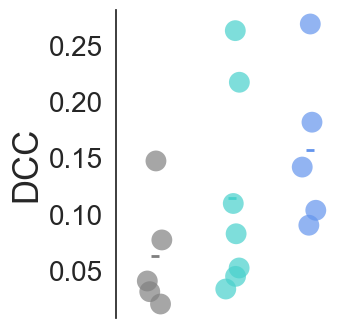

In [171]:

import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (3,4))
ax = sns.pointplot(x="Labels", y="data", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.7)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('DCC', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.ylim(top = 2000, bottom = 0)

plt.savefig(Ffig + 'foxg1_dcc_.svg', transparent = True)
plt.show()

In [174]:
from scipy import stats
data = wt
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.07005415575876417 0.021811282444480152


In [175]:
from scipy import stats
data = het
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.13350783984207928 0.036393554503101576


In [176]:
from scipy import stats
data = hom
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.2458810178250407 0.10321507447992889


In [180]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(wt, het)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(wt, hom)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 9.0   p = 0.20202020202020204
U = 3.0   p = 0.05555555555555555


# Branching ratio

In [ ]:
# Visualise 
#---------------------------------------------------------------------------
av_list = sorted(glob.glob('**_av-*.npy*')) 
pkg_list = sorted(glob.glob('**_pkg-*.npy*')) 

In [31]:
# Branching ratio

#Calculate BR in empirical data

for i in range(len(pkg_list)):
    br = crfn.branch(np.load(pkg_list[i]), np.load(av_list[i]))
    name = av_list[i][:av_list[i].find('run')+7] 
    np.save(savepath + name + '-branch-Tel.npy', br)
    print(name)
    print(str(i) + 'of ' + str(len(av_list)))

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
0of 35
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
1of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
2of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
3of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
5of 35
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
7of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
8of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
9of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
10of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
11of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_
12of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
13of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_
14of

In [225]:

# Visualise 
#---------------------------------------------------------------------------
wt_list = sorted(glob.glob('*++*BLNLIGHT_*branch-*.npy*')) 
het_list = sorted(glob.glob('*+--*BLNLIGHT_*branch-*.npy*')) 
hom_list = sorted(glob.glob('*---*BLNLIGHT_*branch-*.npy*')) 

wt_list, het_list, hom_list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_BLNLIGHT_run-01_-branch-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--09_2

In [226]:
l_list = wt_list, het_list, hom_list
wt, het, hom = [],[],[]
for i in range(len(l_list)):
    print(i)
    for e in range(len(l_list[i])):
        if i == 0:
            wt = np.append(wt, np.load(l_list[i][e]))
        if i == 1:
            het = np.append(het, np.load(l_list[i][e]))
            
        if i == 2:
            hom = np.append(hom, np.load(l_list[i][e]))

0
1
2


In [223]:


import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (3,4))
ax = sns.pointplot(x="Labels", y="data", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.7)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.ylim(top = 2000, bottom = 0)

plt.savefig(Ffig + 'foxg1_BR_ptz.svg', transparent = True)
plt.show()

In [211]:
from scipy import stats
data = wt
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.092820115425635 0.009730843508248502


In [212]:
from scipy import stats
data = het
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.0841517922215487 0.013980361150380847


In [213]:
from scipy import stats
data = hom
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.0596129300089507 0.03096673387055725


In [214]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(wt, het)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(wt, hom)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 14.0   p = 0.3994533348216349
U = 8.0   p = 0.3566515869392288


# Correlation function

In [101]:
#Find range to make bin over for correlation function
coord_l = adfn.return_files(Fdata, 'BLNLIGHTPTZ-FOXG1', '*regcoord*')
coord_l

['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_regcoord.npy',
 'BLNLIGHTPTZ-FOX

In [102]:
from sklearn.metrics.pairwise import euclidean_distances

#Find range to make bin over for correlation function
mini = 0
maxi = 0
dim = [.8, .8, 15]

for c in coord_l:
    coord = np.load(c)
    dist = euclidean_distances(coord)
    curr_max = np.max(dist)
    if maxi < curr_max:
        maxi = curr_max
print(maxi)

671.6972893078173


In [104]:
#Calculate criticality statistics
trace_l = adfn.return_files(Fdata, 'BLNLIGHTPTZ-FOXG1', '*regtrace*')
coord_l = adfn.return_files(Fdata, 'BLNLIGHTPTZ-FOXG1', '*labcoor*')
len(trace_l), len(coord_l)

(35, 35)

In [107]:
for i in range(len(coord_l)):
    sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(np.load(trace_l[i]), np.load(trace_l[i]), np.load(trace_l[i]), np.load(coord_l[i]), 'Telencephalon')
    dist = euclidean_distances(sub_coord) 
    corr = np.corrcoef(sub_trace) #Calculate correlation matrix
    corrdis = crfn.corrdist(corr, dist, 200, mini, maxi)
    
    name = coord_l[i][:coord_l[i].find('run')+7] 
    np.save(savepath + name + '-corrdist-Tel.npy', corrdis)
    print(name)
    print(str(i) + 'of ' + str(len(coord_l)))

BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_
0of 35
BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_
1of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
2of 35
BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_
3of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
4of 35
BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_
5of 35
BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
6of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_
7of 35
BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_
8of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_
9of 35
BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_
10of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_
11of 35
BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_
12of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_BLNLIGHT_run-01_
13of 35
BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_
14of

In [246]:
# Create lists of trace data
#---------------------------------------------------------------------------
import glob

blnlist = sorted(glob.glob('*++*PTZ02_*corrdist-*'))
p5list = sorted(glob.glob('*+--*PTZ02_*corrdist-*'))
p20list = sorted(glob.glob('*---*PTZ02_*corrdist-*'))

blnlist, p5list, p20list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--09_2photon_sess-01-6dpf_PTZ02_run-01_-corrdist-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess

In [ ]:
fig, axarr = plt.subplots(figsize = (7,5))
import matplotlib
from matplotlib import cm

labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$', '10$^3$','10$^4$','10$^5$']

for i in range(len(blnlist)):    
    yaxis, xaxis = prac(blnlist[i])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 0.6, c = 'grey')
    axarr.set_xscale('log')
    axarr.set_yscale('log')


for i in range(len(blnlist)):    
    yaxis, xaxis = prac(p5list[i])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 0.3, c = 'mediumturquoise')
    yaxis, xaxis = prac(p20list[i])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 0.3, c = 'cornflowerblue')

    axarr.set_xscale('log')
    axarr.set_yscale('log')
    

    
    
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('Avalanche duration (s)', size = '17')
axarr.set_ylabel('<S>', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

axarr.set_xticklabels(labels, size = 15)
axarr.set_yticklabels(labels, size = 15)
#plt.xlim(right = 800) 
#plt.ylim(top = 300000)  


plt.savefig(Ffig + 'av_sizexdur_foxg1_PTZ.svg', transparent = True)
plt.show()

In [247]:
from scipy import stats

labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$', '10$^3$','10$^4$','10$^5$']

bln_distlist = [np.load(blnlist[i])[0] [:189]  for i in range(len(blnlist))]
p5_distlist = [np.load(p5list[i])[0][:189] for i in range(len(p5list))]
p20_distlist = [np.load(p20list[i])[0][:189] for i in range(len(p20list))]

bln_corrlist = [np.load(blnlist[i])[1][:189] for i in range(len(blnlist))]
p5_corrlist = [np.load(p5list[i])[1][:189] for i in range(len(p5list))]
p20_corrlist = [np.load(p20list[i])[1][:189] for i in range(len(p20list))]

mean_dist = np.mean(np.vstack((p20_distlist,np.vstack((np.vstack(p5_distlist), np.vstack(bln_distlist))))), axis= 0)

listlist = bln_corrlist, p5_corrlist, p20_corrlist
colors = ['grey', 'mediumturquoise','cornflowerblue']
facecolors = ['k', 'green','royalblue']

lines = ['-', '-', '-']
widths = [2, 2, 2]
fig, axarr = plt.subplots(figsize = (9,5))

for i in range(3):
    sem = stats.sem(listlist[i])
    xaxis = mean_dist*0.8
    yaxis = np.mean(listlist[i], axis=0)
    minus = yaxis-(sem)
    plus = yaxis+(sem)

    axarr.fill_between(xaxis[1:len(xaxis)-1], minus[1:len(xaxis)-1], plus[1:len(xaxis)-1],facecolor=facecolors[i],alpha=0.3)
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = widths[i], markersize = 1, alpha = 1, color = colors[i], linestyle = lines[i])

    
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('Distance d (μm)', size = '17')
axarr.set_ylabel('Correlation r ', size = '17')
axarr.set_xticklabels(labels, size = 15)
axarr.set_yticklabels(labels, size = 15)

axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'foxg1_corrdis_ptz_mean.svg', transparent = True)
plt.show()

In [331]:
# Create lists of trace data
#---------------------------------------------------------------------------
import glob

blnlist = sorted(glob.glob('*++*BLNLIGHT_*corrdist-*'))
p5list = sorted(glob.glob('*+--*BLNLIGHT_*corrdist-*'))
p20list = sorted(glob.glob('*---*BLNLIGHT_*corrdist-*'))

blnlist, p5list, p20list

blnslope, p5slope, p20slope = list(range(len(blnlist))), list(range(len(p5list))), list(range(len(p20list)))
blncorr, precorr, p20corr = list(range(len(blnlist))), list(range(len(p5list))), list(range(len(p20list)))

In [335]:
point = np.zeros((18))

p_spike_df = {}
count=0
choose = 0

data = [blncorr, p5corr, p20corr]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

p_spike_df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('WT',5),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})


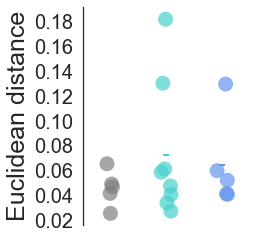

In [336]:


import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (3,4))
ax = sns.pointplot(x="Labels", y="data", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.7)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Euclidean distance', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.ylim(top = 2000, bottom = 0)

plt.savefig(Ffig + 'foxg1_corrdist_spont.svg', transparent = True)
plt.show()

In [314]:

blnslope, p5slope, p20slope = list(range(len(blnlist))), list(range(len(p5list))), list(range(len(p20list)))
blncorr, precorr, p20corr = list(range(len(blnlist))), list(range(len(p5list))), list(range(len(p20list)))

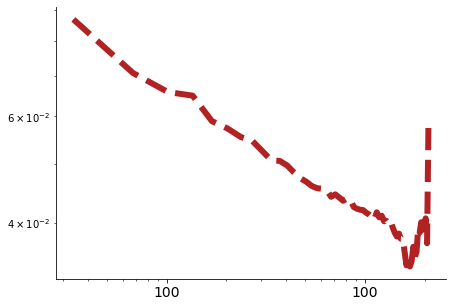

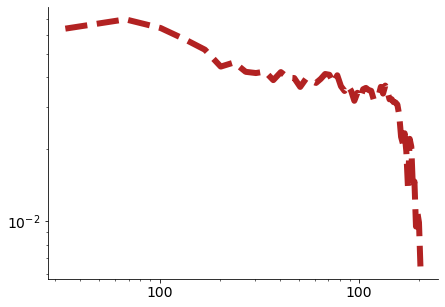

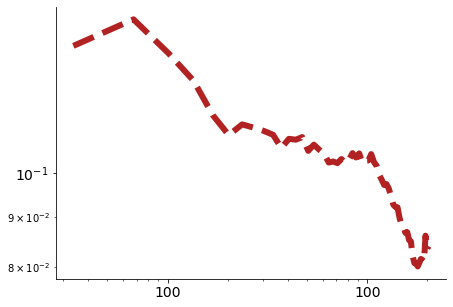

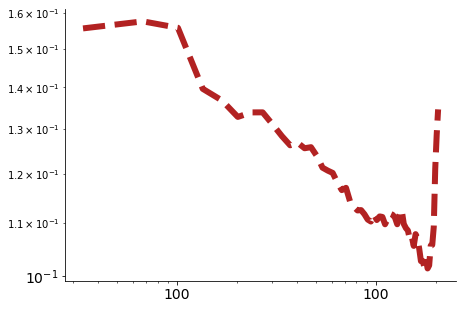

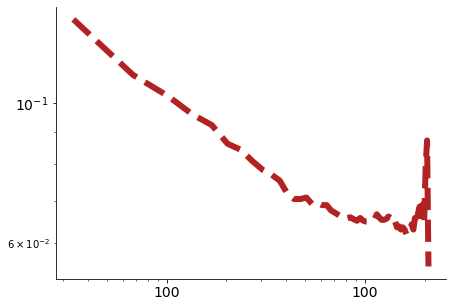

In [334]:
import seaborn as sns

import matplotlib
import powerlaw
sns.reset_orig()
num1 = adfn.name_zero('front',2,12,1)

colors = ['black', 'darkorange','firebrick']
lines = ['-', '--', '--']
widths = [4, 6, 6]



count=0

llist = blnlist
for i in range(len(blnlist)):

        fig, axarr = plt.subplots(figsize = (7,5))
        data = np.load(llist[i])
        xaxis = data[0]
        yaxis = data[1]
        axarr.plot(xaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]], yaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]], '-', linewidth = widths[e], markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
        blnslope[i] = -1*stats.linregress(np.log10(xaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]]), np.log10(yaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]]))[0]
        m,c = np.polyfit(np.log10(xaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]]), np.log10(yaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]]), 1)
        y_fit = 10**(m*(np.log10(xaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]])) + c) # calculate the fitted values of y 
        blncorr[i] = np.linalg.norm(yaxis[1:np.where(np.isnan(yaxis[1:]) == True) [0][0]]-y_fit) #stats.pearsonr(yaxis[1:], y_fit)[0]
        #axarr.plot(xaxis[1:len(xaxis)-1], y_fit[1:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, color ='k', linestyle = '-')

        
        
        count+=1
        axarr.set_xscale('log')
        axarr.set_yscale('log')
        #axarr.set_xlabel('Distance d (μm)', size = '13')
        #axarr.set_ylabel('Correlation c ', size = '13')

        axarr.set_xticklabels(['100', '100', '100', '100'])
        axarr.spines['top'].set_visible(False)
        axarr.spines['right'].set_visible(False)
        plt.yticks(fontsize = 14)
        plt.xticks(fontsize = 14)

        #plt.savefig(Ffig + 'corrdist_sz' + str(count) + '.svg', transparent = True)
        plt.show()

# Eigenspectra + State space velocity

In [2]:
import glob
experiment = 'BLNLIGHTPTZ-FOXG1'
savepath = Fdata + experiment + os.sep 
os.chdir(Fdata +  experiment)
binlist = sorted(glob.glob('*_regtrace*'))
coordlist =  sorted(glob.glob('*labcoord*'))
coordlist, binlist

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'B

In [ ]:
data_list = binlist
for e in range(len(data_list)):
    
    trace = np.load(data_list[e])
    coord = np.load(coordlist[e])
    sub_trace, sub_coord = adfn.select_region(trace, coord, 'Telencephalon')
    data = sub_trace[:,:9828]
    name = binlist[e][:binlist[e].find('run')+7]
    n_components = np.min(data.shape)
    eig = efn.eigspec(data, n_components) #calculat eigenspec
    np.save(savepath + name + 'eig-Tel.npy', eig)
    print(str(e) + 'of' + str(len(data_list))) 

In [3]:
# BLN Avalanche distributions

# Visualise 
#---------------------------------------------------------------------------
wt_list = sorted(glob.glob('*++*PTZ02_*velocity-*.npy*')) 
het_list = sorted(glob.glob('*+--*PTZ02_*velocity-*.npy*')) 
hom_list = sorted(glob.glob('*---*PTZ02_*velocity-*.npy*')) 

wt_list, het_list, hom_list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_velocity-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_velocity-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_velocity-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_velocity-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_velocity-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_velocity-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_velocity-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_PTZ02_run-01_velocity-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_PTZ02_run-01_velocity-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_PTZ02_run-01_velocity-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_PTZ02_run-01_velocity-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--09_2photon_sess-01-6dpf_PTZ02_run-01_velocity-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_2photon_sess-01-6dpf_PTZ

In [4]:
colors2 = ['grey','mediumturquoise','cornflowerblue']
comb_l = [wt_list, het_list, hom_list]

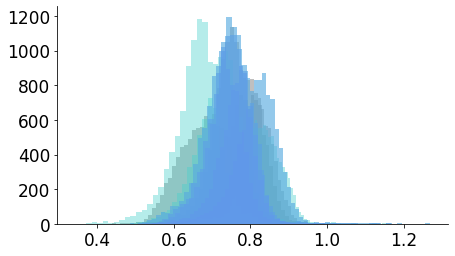

In [5]:


fig, axarr = plt.subplots(figsize = (7,4))

for e in range(len(comb_l)):
    if e == 0:
        for i in range(len(comb_l[e])):
            plt.hist(np.load(wt_list[i]),color = colors2[0], bins = 50, alpha = 0.5)
    if e == 1:
        for i in range(len(comb_l[e])):
            plt.hist(np.load(het_list[i]),color = colors2[1], bins = 50, alpha = 0.4 )
    if e == 2:
        for i in range(len(comb_l[e])):
            plt.hist(np.load(het_list[i]),color = colors2[2], bins = 50, alpha = 0.4 )
    
plt.yticks(size = 17)
plt.xticks(size = 17, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'foxg1_velocity_emp_ptz.svg', transparent = True)
plt.show()    

In [6]:
l_list = wt_list, het_list, hom_list
wt, het, hom = [],[],[]
choose = 0
for i in range(len(l_list)):
    print(i)
    for e in range(len(l_list[i])):
        if i == 0:
            wt = np.append(wt, np.mean(np.load(l_list[i][e])))
        if i == 1:
            het = np.append(het, np.mean(np.load(l_list[i][e])))
            
        if i == 2:
            hom = np.append(hom, np.mean(np.load(l_list[i][e])))

0
1
2


In [7]:
point = np.zeros((17))

p_spike_df = {}
count=0
choose = 0

data = [wt, het, hom]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

p_spike_df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

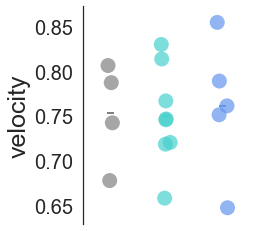

In [10]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (3,4))
ax = sns.pointplot(x="Labels", y="data", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.7)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('velocity', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.ylim(top = 2000, bottom = 0)

#plt.savefig(Ffig + 'avsize_exp_ptz.svg', transparent = True)
plt.show()

In [9]:
from scipy import stats
data = wt
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

from scipy import stats
data = het
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

from scipy import stats
data = hom
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(wt, het)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(wt, hom)
print('U = ' + str(U) +  '   p = ' + str(p))


0.753610631180943 0.0284979022090747
0.7501743878464678 0.01935652112998383
0.7608825342214706 0.03349768086144441
U = 16.0   p = 0.46616218667416665
U = 9.0   p = 0.4512616250888397


# metastability

In [12]:
import glob
experiment = 'BLNLIGHTPTZ-FOXG1'
savepath = Fdata + experiment + os.sep 
os.chdir(Fdata +  experiment)
binlist = sorted(glob.glob('*_regbin*'))
coordlist =  sorted(glob.glob('*labcoord*'))
coordlist, binlist

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-04_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_BLNLIGHT_run-01_labcoord.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_labcoord.npy',
  'B

In [ ]:
from sklearn.cluster import AffinityPropagation
import copy

data_list = binlist
for e in range(len(data_list)):
    
    trace = np.load(data_list[e])
    coord = np.load(coordlist[e])
    sub_trace, sub_coord = adfn.select_region(trace, coord, 'Telencephalon')
    data = sub_trace[:,1:9827].T
    name = binlist[e][:binlist[e].find('run')+7]


    #Empirical data
    all_clust, sub_clust = mfn.affprop(data) #cluster with affinity prop on empirical data
    emp_sim = mfn.Sim_loop(data, all_clust, sub_clust) #calculate similarity between clustered states

    #Generate null data
    rpks = np.zeros((data.shape))
    for t in range(data.shape[0]):
        temp_pks = data[t]
        np.random.shuffle(temp_pks) 
        rpks[t] = temp_pks

    null_all_clust, null_sub_clust = mfn.affprop(rpks) #cluster with affinity prop on null data
    null_sim = mfn.Sim_loop(rpks, null_all_clust, null_sub_clust) #calculate similarity between clustered states
    n_states = len(emp_sim > np.max(null_sim))
    if len(emp_sim) > n_states:
        print('null model removed a cluster')

    fin_clust = sub_clust[emp_sim > max(null_sim)] #Find the clusters that occur above chance
    p_state, m_dwell, v_dwell = mfn.state_stats(fin_clust, all_clust) #Calculate state transition statistics
    null_m_dwell = mfn.null_states(fin_clust, data) #Calculate the mean dwell time with random dynamics
    np.save(savepath + name +'metastates-Tel.npy', [n_states, p_state, m_dwell, null_m_dwell, v_dwell]) 

    print(str(e) + 'of ' + str(len(data_list)))

In [13]:
# BLN Avalanche distributions
import glob
# Visualise 
#---------------------------------------------------------------------------
wt_list = sorted(glob.glob('*++*PTZ02_*metastates-*.npy*')) 
het_list = sorted(glob.glob('*+--*PTZ02_*metastates-*.npy*')) 
hom_list = sorted(glob.glob('*---*PTZ02_*metastates-*.npy*')) 

wt_list, het_list, hom_list

(['BLNLIGHTPTZ-FOXG1++-01_2photon_sess-01-6dpf_PTZ02_run-01_metastates-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-02_2photon_sess-01-6dpf_PTZ02_run-01_metastates-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-03_2photon_sess-01-6dpf_PTZ02_run-01_metastates-Tel.npy',
  'BLNLIGHTPTZ-FOXG1++-05_2photon_sess-01-6dpf_PTZ02_run-01_metastates-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1+--02_2photon_sess-01-6dpf_PTZ02_run-01_metastates-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--03_2photon_sess-01-6dpf_PTZ02_run-01_metastates-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--04_2photon_sess-01-6dpf_PTZ02_run-01_metastates-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--05_2photon_sess-01-6dpf_PTZ02_run-01_metastates-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--06_2photon_sess-01-6dpf_PTZ02_run-01_metastates-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--07_2photon_sess-01-6dpf_PTZ02_run-01_metastates-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--08_2photon_sess-01-6dpf_PTZ02_run-01_metastates-Tel.npy',
  'BLNLIGHTPTZ-FOXG1+--09_2photon_sess-01-6dpf_PTZ02_run-01_metastates-Tel.npy'],
 ['BLNLIGHTPTZ-FOXG1---02_

In [14]:
l_list = wt_list, het_list, hom_list
wt, het, hom = [],[],[]
choose = 0
for i in range(len(l_list)):
    print(i)
    for e in range(len(l_list[i])):
        if i == 0:
            wt = np.append(wt, np.load(l_list[i][e], allow_pickle=True)[choose])
        if i == 1:
            het = np.append(het, np.load(l_list[i][e],allow_pickle=True)[choose])
            
        if i == 2:
            hom = np.append(hom, np.load(l_list[i][e],allow_pickle=True)[choose])

0
1
2


In [15]:
point = np.zeros((17))

p_spike_df = {}
count=0
choose = 0

data = [wt, het, hom]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

p_spike_df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

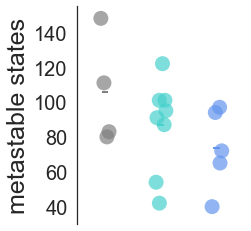

In [16]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (3,4))
ax = sns.pointplot(x="Labels", y="data", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.7)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('metastable states', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.ylim(top = 2000, bottom = 0)

plt.savefig(Ffig + 'foxg1_meta_comp_ptz.svg', transparent = True)
plt.show()

In [17]:
from scipy import stats
data = wt
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

from scipy import stats
data = het
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

from scipy import stats
data = hom
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(wt, het)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(wt, hom)
print('U = ' + str(U) +  '   p = ' + str(p))



105.5 15.792930908057144
86.625 9.26771951452999
73.6 10.414413089560064
U = 13.0   p = 0.33529144723530485
U = 4.0   p = 0.08895479749349122


In [18]:
#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(wt, het)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(wt, hom)
print('U = ' + str(U) +  '   p = ' + str(p))


U = 13.0   p = 0.33529144723530485
U = 4.0   p = 0.08895479749349122


In [19]:
l_list = wt_list, het_list, hom_list
wt, het, hom = [],[],[]
choose = 0
for i in range(len(l_list)):
    print(i)
    for e in range(len(l_list[i])):
        if i == 0:
            wt = np.append(wt, np.mean(np.load(l_list[i][e], allow_pickle=True)[2])  - np.load(l_list[i][e], allow_pickle=True)[3])
        if i == 1:
            het = np.append(het, np.mean(np.load(l_list[i][e], allow_pickle=True)[2])  - np.load(l_list[i][e], allow_pickle=True)[3])
            
        if i == 2:
            hom = np.append(hom, np.mean(np.load(l_list[i][e], allow_pickle=True)[2])  - np.load(l_list[i][e], allow_pickle=True)[3])

0
1
2


In [20]:
point = np.zeros((17))

p_spike_df = {}
count=0
choose = 0

data = [wt, het, hom]

for e in range(len(data)):
    for i in range(len(data[e])):
        point[count] = data[e][i]
        count+=1

p_spike_df = pd.DataFrame({"data":point , "Labels":  np.append(adfn.repeat_list('WT',4),np.append(adfn.repeat_list('HET',8),adfn.repeat_list('HOM',5)))})

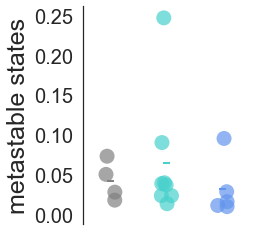

In [21]:
import seaborn as sns

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['grey','mediumturquoise','cornflowerblue']

fig, ax = plt.subplots(figsize = (3,4))
ax = sns.pointplot(x="Labels", y="data", data = p_spike_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="data", data=p_spike_df, hue = 'Labels', palette = colors2, size = 15, jitter = True ,alpha = 0.7)

plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('metastable states', size = '25')
ax.get_xaxis().set_visible(False)
#ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
#plt.ylim(top = 2000, bottom = 0)

plt.savefig(Ffig + 'foxg1_metadwell_comp_ptz.svg', transparent = True)
plt.show()

In [22]:
from scipy import stats
data = wt
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

from scipy import stats
data = het
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

from scipy import stats
data = hom
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

#BLN - SZ
alpha = 0.05/2

U, p = stats.mannwhitneyu(wt, het)
print('U = ' + str(U) +  '   p = ' + str(p))

    
U, p = stats.mannwhitneyu(wt, hom)
print('U = ' + str(U) +  '   p = ' + str(p))

0.042186486500242315 0.012293081300236978
0.06398600998569404 0.02736872369575797
0.032069434435695855 0.016143303756344693
U = 16.0   p = 0.46616218667416665
U = 6.0   p = 0.1956336396413197
